# <p style="background-color: #f5df18; padding: 10px;">Programming & Plotting in Python | **Plotting** </p>

<div style="display: flex;">
    <div style="flex: 1; margin-right: 20px;">
        <h2>Questions</h2>
        <ul>
            <li>How can I plot my data?</li>
            <li>How can I save my plot for publishing?</li>
        </ul>
    </div>
    <div style="flex: 1;">
        <h2>Learning Objectives</h2>
        <ul>
            <li>Create a scatter plot showing relationship between two data sets.</li>
            <li>Create a time series plot showing a single data set.</li>
        </ul>
    </div>
</div>

## [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.

- Commonly use a sub-library called [`matplotlib.pyplot`](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
- The Jupyter Notebook will render plots inline by default.

In [1]:
import matplotlib.pyplot as plt

- Simple plots are then (fairly) simple to create.

Text(0, 0.5, 'Position (km)')

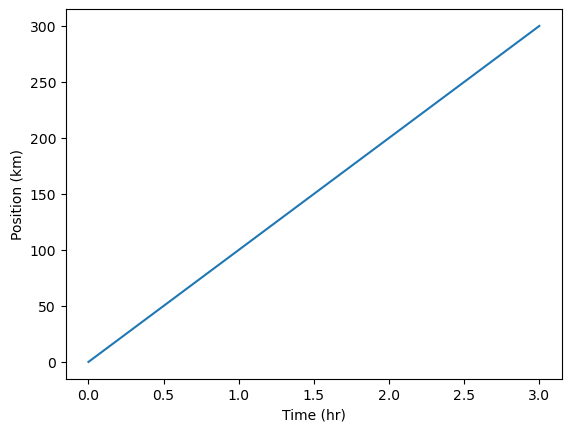

In [2]:
### position vs time plot ### 


time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## 🔔 Display All Open Figures

In our Jupyter Notebook example, running the cell should generate the figure directly below the code.
The figure is also included in the Notebook document for future viewing.
However, other Python environments like an interactive Python session started from a terminal
or a Python script executed via the command line require an additional command to display the figure.

Instruct `matplotlib` to show a figure:

```python
plt.show()
```

This command can also be used within a Notebook - for instance, to display multiple figures
if several are created by a single cell.


## Plot data directly from a [`Pandas dataframe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

- We can also plot [Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).
- Before plotting, we convert the column headings from a `string` to `integer` data type, since they represent numerical values,
  using [str.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) to remove the `gpdPercap_`
  prefix and then [astype(int)](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html)
  to convert the series of string values (`['1952', '1957', ..., '2007']`) to a series of integers: `[1925, 1957, ..., 2007]`.

In [7]:
### Import pandas and load "gapminder_gdp_oceania.csv" file ###

import pandas as pd

data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')


<Axes: >

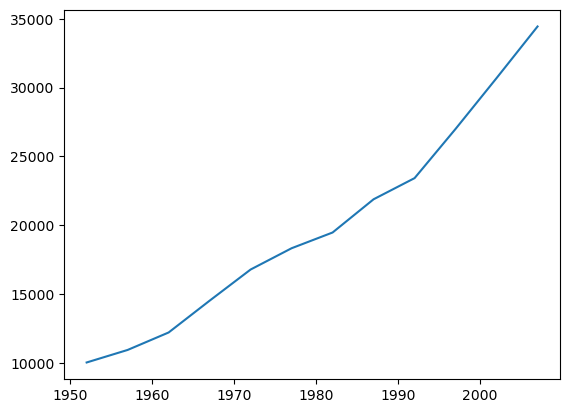

In [8]:
# Extract year from last 4 characters of each column name
# The current column names are structured as 'gdpPercap_(year)', 
# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use replace(), which removes from the string the characters stated in the argument
# This method works on strings, so we use replace() from Pandas Series.str vectorized string functions


years = data.columns.str.replace('gdpPercap_', '')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

data.loc['Australia'].plot()



## Select and transform data, then plot it.

- By default, [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot) plots with the rows as the X axis.
- We can transpose the data in order to plot multiple series.

Text(0, 0.5, 'GDP per capita')

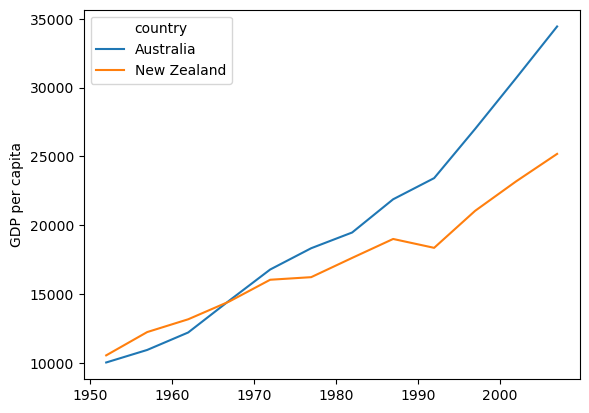

In [9]:
data.T.plot()
plt.ylabel('GDP per capita')

## Many styles of plot are available.

- For example, do a bar plot using a fancier style.

```python
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
```

<div>
<img src="https://swcarpentry.github.io/python-novice-gapminder/fig/9_gdp_bar.svg" width="500"/>
</div>


## Data can also be plotted by calling the `matplotlib` `plot` function directly.

- The command is `plt.plot(x, y)`
- The color and format of markers can also be specified as an additional optional argument e.g., `b-` is a blue line, `g--` is a green dashed line.


## Get Australia data from dataframe

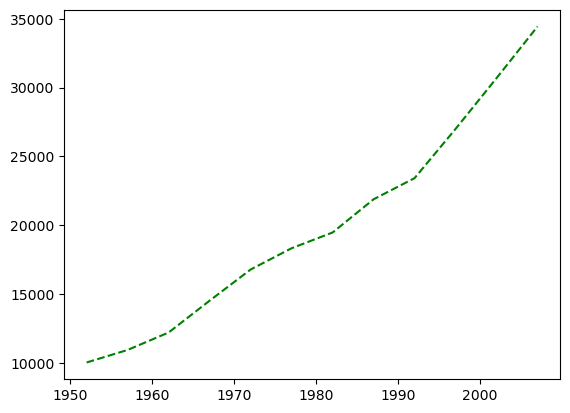

In [10]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')

## Can plot many sets of data together.

Text(0, 0.5, 'GDP per capita ($)')

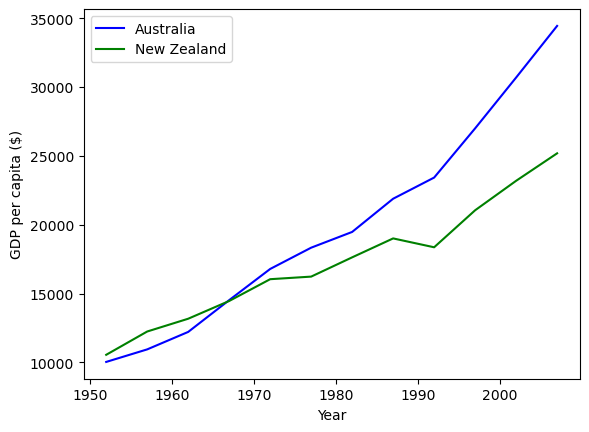

In [12]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')


## 🔔 Adding a Legend

Often when plotting multiple datasets on the same figure it is desirable to have
a legend describing the data.

This can be done in `matplotlib` in two stages:

- Provide a label for each dataset in the figure:

```python
plt.plot(years, gdp_australia, label='Australia')
plt.plot(years, gdp_nz, label='New Zealand')
```

- Instruct `matplotlib` to create the legend.

```python
plt.legend()
```

By default matplotlib will attempt to place the legend in a suitable position. If you
would rather specify a position this can be done with the `loc=` argument, e.g to place
the legend in the upper left corner of the plot, specify `loc='upper left'`

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Exercise </p>

Plot a scatter plot correlating the GDP of Australia and New Zealand. Use either plt.scatter or DataFrame.plot.scatter

## Solution ## 

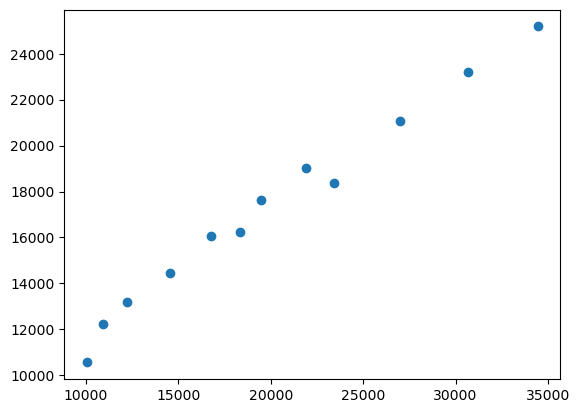

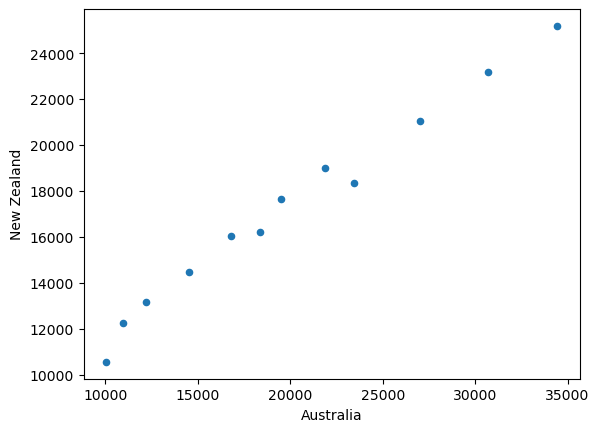

In [14]:
plt.scatter(gdp_australia, gdp_nz)
plt.show()

data.T.plot.scatter(x = 'Australia', y = 'New Zealand')
plt.show()

## <p style="background-color: #f5df18; padding: 10px;"> 🛑  Minima and Maxima </p>

---

Fill in the blanks below to plot the minimum GDP per capita over time
for all the countries in Europe.
Modify it again to plot the maximum GDP per capita over time for Europe.

```python
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90)
```

## Solution ## 

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(-2.0, 0, 'gdpPercap_2002'),
  Text(0.0, 0, 'gdpPercap_1952'),
  Text(2.0, 0, 'gdpPercap_1962'),
  Text(4.0, 0, 'gdpPercap_1972'),
  Text(6.0, 0, 'gdpPercap_1982'),
  Text(8.0, 0, 'gdpPercap_1992'),
  Text(10.0, 0, 'gdpPercap_2002'),
  Text(12.0, 0, '')])

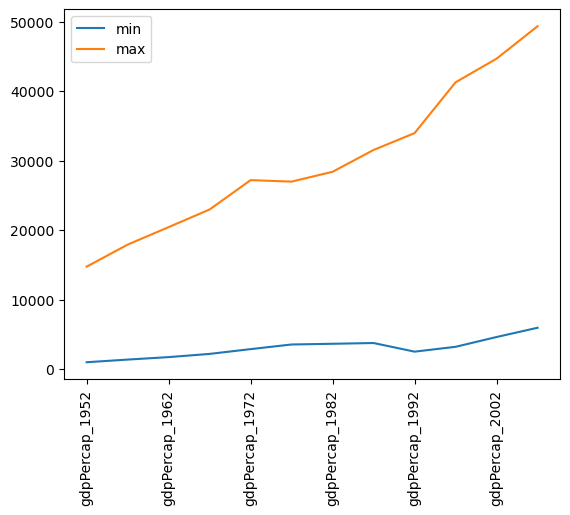

In [15]:
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Correlations </p>

---

Modify the example in the notes to create a scatter plot showing
the relationship between the minimum and maximum GDP per capita
among the countries in Asia for each year in the data set.
What relationship do you see (if any)?

## Solution ## 

<Axes: xlabel='min', ylabel='max'>

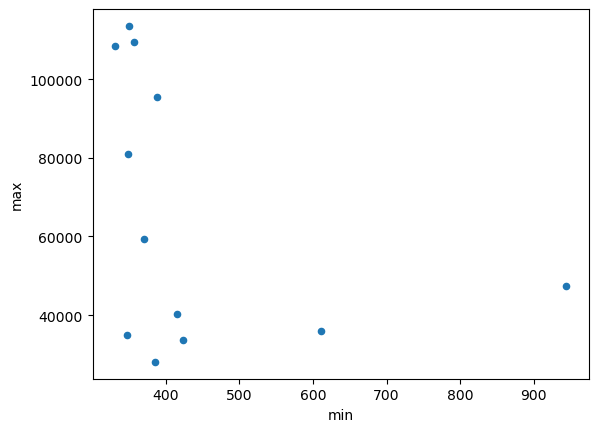

In [16]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')


No particular correlations can be seen between the minimum and maximum gdp values
year on year. It seems the fortunes of asian countries do not rise and fall together.


## <p style="background-color: #f5df18; padding: 10px;"> 🛑 Correlations (continued) </p>
---

You might note that the variability in the maximum is much higher than
that of the minimum.  Take a look at the maximum and the max indexes:

```python
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())
```

## Solution 

gdpPercap_1952          Kuwait
gdpPercap_1957          Kuwait
gdpPercap_1962          Kuwait
gdpPercap_1967          Kuwait
gdpPercap_1972          Kuwait
gdpPercap_1977          Kuwait
gdpPercap_1982    Saudi Arabia
gdpPercap_1987          Kuwait
gdpPercap_1992          Kuwait
gdpPercap_1997          Kuwait
gdpPercap_2002       Singapore
gdpPercap_2007          Kuwait
dtype: object
gdpPercap_1952    Myanmar
gdpPercap_1957    Myanmar
gdpPercap_1962    Myanmar
gdpPercap_1967    Myanmar
gdpPercap_1972    Myanmar
gdpPercap_1977    Myanmar
gdpPercap_1982    Myanmar
gdpPercap_1987    Myanmar
gdpPercap_1992    Myanmar
gdpPercap_1997    Myanmar
gdpPercap_2002    Myanmar
gdpPercap_2007    Myanmar
dtype: object


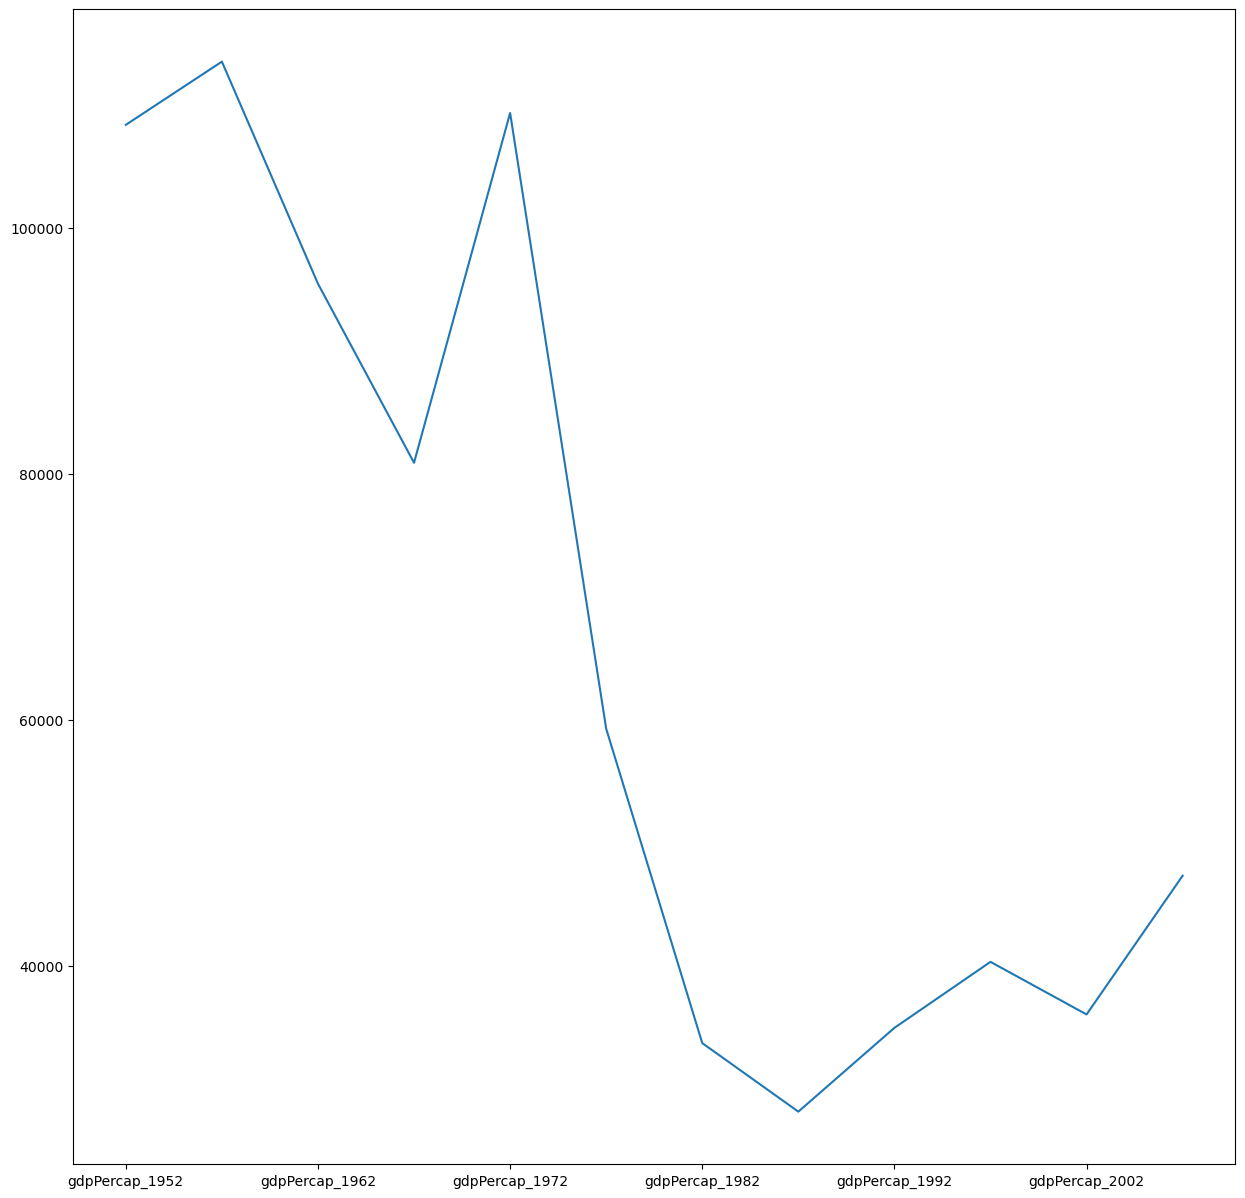

In [20]:
plt.figure(figsize=(15, 15))
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())

Seems the variability in this value is due to a sharp drop after 1972.
Some geopolitics at play perhaps? Given the dominance of oil producing countries,
maybe the Brent crude index would make an interesting comparison?
Whilst Myanmar consistently has the lowest gdp, the highest gdb nation has varied
more notably.

## <p style="background-color: #f5df18; padding: 10px;"> 🛑 More correlations </p>
---

This short program creates a plot showing
the correlation between GDP and life expectancy for 2007,
normalizing marker size by population:

```python
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)
```

Using online help and other resources,
explain what each argument to `plot` does.

## Solution ##
----

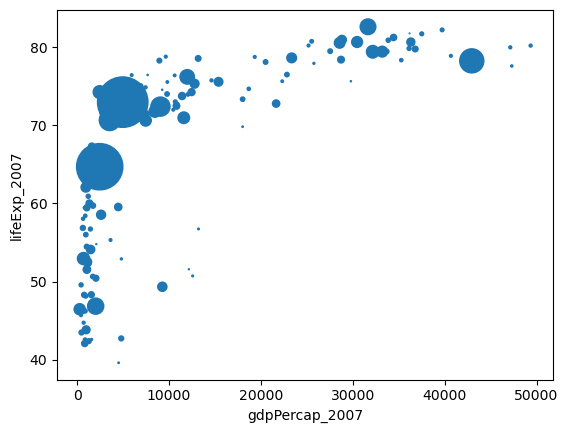

In [22]:

data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

plt.show()

A good place to look is the documentation for the plot function -
help(data\_all.plot).

kind - As seen already this determines the kind of plot to be drawn.

x and y - A column name or index that determines what data will be
placed on the x and y axes of the plot

s - Details for this can be found in the documentation of plt.scatter.
A single number or one value for each data point. Determines the size
of the plotted points.

## 🔔 Saving your plot to a file
---

If you are satisfied with the plot you see you may want to save it to a file,
perhaps to include it in a publication. There is a function in the
matplotlib.pyplot module that accomplishes this:
[savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html).
Calling this function, e.g. with

```python
plt.savefig('my_figure.png')
```

will save the current figure to the file `my_figure.png`. The file format
will automatically be deduced from the file name extension (other formats
are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable
and after a figure has been displayed to the screen (e.g. with `plt.show`)
matplotlib will make this  variable refer to a new empty figure.
Therefore, make sure you call `plt.savefig` before the plot is displayed to
the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line.
In addition to using `plt.savefig`, we can save a reference to the current figure
in a local variable (with `plt.gcf`) and call the `savefig` class method from
that variable to save the figure to file.

```python
data.plot(kind='bar')
fig = plt.gcf() # get current figure
fig.savefig('my_figure.png')
```

## 🔔 Making your plots accessible
---

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots.

- Always make sure your text is large enough to read. Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and [`tick_params` with `labelsize`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html) to increase the text size of the numbers on your axes.
- Similarly, you should make your graph elements easy to see. Use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.
- Using color (and nothing else) to distinguish between different plot elements will make your plots unreadable to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points. If you're unsure about your colors, you can use [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots would look like to those with colorblindness.

# <p style="background-color: #f5df18; padding: 10px;"> 🗝️ Key points</p>
---

- [`matplotlib`](https://matplotlib.org/) is the most widely used scientific plotting library in Python.
- Plot data directly from a Pandas dataframe.
- Select and transform data, then plot it.
- Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options.
- Can plot many sets of data together.